# Kapitel 1

In [2]:
from shapely.geometry import Polygon

polygon1 = Polygon([(30,10), (40,50), (20,35), (10,20), (30,10)])

print(polygon1.area)

525.0


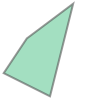

In [3]:
polygon1

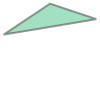

In [4]:
polygon2 = Polygon([(20,20), (80,30), (50,40), (20,20)])
polygon2

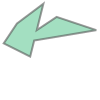

In [5]:
polygon1.union(polygon2)

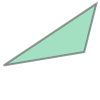

In [6]:
polygon1.intersection(polygon2)

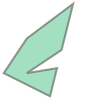

In [7]:
polygon1.difference(polygon2)

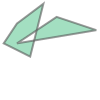

In [8]:
polygon2.symmetric_difference(polygon1)

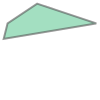

In [9]:
polygon2.difference(polygon1)

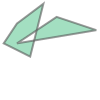

In [16]:
polygon3 = polygon2.symmetric_difference(polygon1)

type(polygon3)
polygon3

In [17]:
polygon3.wkt

'MULTIPOLYGON (((20 20, 33.04347826086956 22.17391304347826, 30 10, 10 20, 20 35, 40 50, 35 30, 20 20)), ((35 30, 50 40, 80 30, 33.04347826086956 22.17391304347826, 35 30)))'

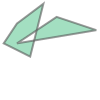

In [20]:
import shapely.wkt
p = 'MULTIPOLYGON (((20 20, 33.04347826086956 22.17391304347826, 30 10, 10 20, 20 35, 40 50, 35 30, 20 20)), ((35 30, 50 40, 80 30, 33.04347826086956 22.17391304347826, 35 30)))'
polygon4 = shapely.wkt.loads(p)
polygon4

In [21]:
polygon3.equals(polygon4)

True

## Vektordaten lesen

In [22]:
import fiona

In [23]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SQLite': 'raw',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [24]:
import geoutils
import zipfile
import os

os.mkdir("geodata")
geoutils.download(geoutils.geodata["natural-earth"], "geodata/ne.gpkg.zip")
with zipfile.ZipFile("geodata/ne.gpkg.zip", 'r') as z:
    z.extractall("geodata")

FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'geodata'

In [25]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", layer="ne_10m_airports")

In [31]:
airport = next(iter(c))

In [32]:
airport

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('scalerank', 9),
              ('featurecla', 'Airport'),
              ('type', 'small'),
              ('name', 'Sahnewal'),
              ('abbrev', 'LUH'),
              ('location', 'terminal'),
              ('gps_code', 'VILD'),
              ('iata_code', 'LUH'),
              ('wikipedia', 'http://en.wikipedia.org/wiki/Sahnewal_Airport'),
              ('natlscale', 8.0),
              ('comments', None),
              ('wikidataid', 'Q7399709'),
              ('name_ar', None),
              ('name_bn', None),
              ('name_de', None),
              ('name_en', 'Sahnewal Airport'),
              ('name_es', None),
              ('name_fr', 'aéroport de Sahnewal'),
              ('name_el', None),
              ('name_hi', 'सहेनवाल हवाई अड्डा'),
              ('name_hu', None),
              ('name_id', None),
              ('name_it', None),
              ('name_ja', None),
              ('name_ko', None),
  

In [27]:
airport['properties']['name']

'Sahnewal'

In [33]:
c.close()

In [34]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", layer="ne_10m_airports")

for airport in c:
    if airport['properties']['iata_code'] == 'ZRH':
        print(airport)

{'type': 'Feature', 'id': '824', 'properties': OrderedDict([('scalerank', 3), ('featurecla', 'Airport'), ('type', 'major'), ('name', "Zurich Int'l"), ('abbrev', 'ZRH'), ('location', 'terminal'), ('gps_code', 'LSZH'), ('iata_code', 'ZRH'), ('wikipedia', 'http://en.wikipedia.org/wiki/Z%C3%BCrich_Airport'), ('natlscale', 75.0), ('comments', None), ('wikidataid', 'Q15114'), ('name_ar', 'مطار زيورخ الدولي'), ('name_bn', 'জুরিখ বিমানবন্দর'), ('name_de', 'Flughafen Zürich'), ('name_en', 'Zurich Airport'), ('name_es', 'Aeropuerto Internacional de Zúrich'), ('name_fr', 'aéroport international de Zurich'), ('name_el', None), ('name_hi', None), ('name_hu', 'Zürichi repülőtér'), ('name_id', 'Bandar Udara Internasional Zürich'), ('name_it', 'aeroporto di Zurigo'), ('name_ja', 'チューリッヒ空港'), ('name_ko', '취리히 공항'), ('name_nl', 'Luchthaven Zürich'), ('name_pl', 'Port lotniczy Zurych-Kloten'), ('name_pt', 'Aeroporto de Zurique'), ('name_ru', 'Цюрих'), ('name_sv', 'Zürich flygplats'), ('name_tr', 'Zürih H

In [35]:
alles = list(c)

len(alles)

893

In [41]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", layer="ne_10m_airports")

for airport in c:
    geometry = airport['geometry']['coordinates']
    print(geometry)

(75.95707224036518, 30.850359856170176)
(75.93305977107549, 17.625415183635024)
(85.3235970368767, 23.317724598996193)
(48.74710654359313, 31.343158556075725)
(78.21721865463483, 26.28548769793701)
(42.97109630194003, 14.755253441372462)
(75.8092915005895, 22.72774918757095)
(73.81056749246886, 19.966020567280626)
(76.80172611052417, 30.670724894966725)
(75.39584329220051, 19.867296962108234)
(72.9878190922305, 31.362743548086222)
(73.3163595376585, 54.95764829340594)
(82.66715245258652, 55.00958471362636)
(35.30187285752786, 47.873263557902284)
(101.44656929844086, 0.4646008729985052)
(145.24398029858185, 14.171771297121616)
(73.40849647643748, 61.340167219448126)
(78.7089578747476, 10.76035713065535)
(63.027933351918136, 25.988794590011004)
(66.94873114809494, 30.249043186181034)
(60.90070856491495, 29.475294195657344)
(112.71141861725775, -7.929980028405668)
(83.55045321240377, 53.3633850813046)
(75.75848284560045, 31.43294223977149)
(79.45200268765704, 28.421808716114356)
(73.03204

In [45]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", layer="ne_10m_admin_0_countries")

for country in c:
    if country['properties']['NAME'] == "Switzerland":
        print(country["geometry"]["type"])
        print(country['geometry'])
c.close()

Polygon
{'type': 'Polygon', 'coordinates': [[(10.453811076000136, 46.864427389000056), (10.4485400800001, 46.83223297100001), (10.444922730000116, 46.82324127200006), (10.439031616000108, 46.816885071000044), (10.417224162000082, 46.79884999700003), (10.419084513000087, 46.78396718300009), (10.426215861000031, 46.76942026800005), (10.428696330000008, 46.75564849900009), (10.41660404400011, 46.74301361100008), (10.399654175000109, 46.735546367000055), (10.395623413000123, 46.726399639000064), (10.396553588000074, 46.71500498400006), (10.394383179000073, 46.700819804000005), (10.384771363000084, 46.689011739000094), (10.373919312000112, 46.68190623000008), (10.36916508000013, 46.67239776600009), (10.377536662000097, 46.65327748599999), (10.395623413000123, 46.638808085000065), (10.438204793000097, 46.63565582300002), (10.459082072000058, 46.62356353800003), (10.466626831000013, 46.60428822900009), (10.465903361000102, 46.57847585100008), (10.457945190000146, 46.55369700100003), (10.45183